In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([1,1],[0,1],color='red',linewidth=2)
plt.plot([1,2],[2,2],color='red',linewidth=2)
plt.plot([2,2],[2,1],color='red',linewidth=2)
plt.plot([2,3],[1,1],color='red',linewidth=2)

fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([1,1],[0,1],color='red',linewidth=2)
plt.plot([1,2],[2,2],color='red',linewidth=2)
plt.plot([2,2],[2,1],color='red',linewidth=2)
plt.plot([2,3],[1,1],color='red',linewidth=2)

plt.text(0.5,2.5,'S0',size=14,ha='center')
plt.text(1.5,2.5,'S1',size=14,ha='center')
plt.text(2.5,2.5,'S2',size=14,ha='center')
plt.text(0.5,1.5,'S3',size=14,ha='center')
plt.text(1.5,1.5,'S4',size=14,ha='center')
plt.text(2.5,1.5,'S5',size=14,ha='center')
plt.text(0.5,0.5,'S6',size=14,ha='center')
plt.text(1.5,0.5,'S7',size=14,ha='center')
plt.text(2.5,0.5,'S8',size=14,ha='center')
plt.text(0.5,2.3,'START',ha='center')
plt.text(2.5,0.3,'GOAL',ha='center')

ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

line, = ax.plot([0.5],[2.5],marker="o",color='g',markersize = 60)

In [ ]:
theta_0 = np.array([[np.nan, 1, 1, np.nan],
                  [np.nan, 1, np.nan, 1],
                  [np.nan, np.nan, 1, 1],
                  [1, 1, 1, np.nan],
                  [np.nan, np.nan, 1, 1],
                  [1, np.nan, np.nan, np.nan],
                  [1, np.nan, np.nan, np.nan],
                  [1, 1, np.nan, np.nan]
                   ])

In [ ]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

def softmax_convert_into_pi_from_theta(theta):
    beta = 1.0
    [m, n] = theta.shape
    pi = np.zeros((m,n))
    
    exp_theta = np.exp(beta * theta)
    
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


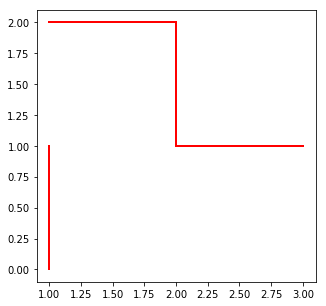

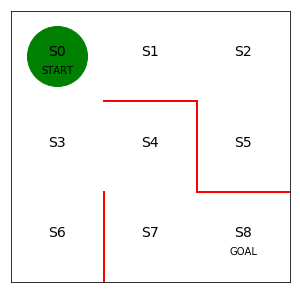

In [1]:
#pi_0 = simple_convert_into_pi_from_theta(theta_0)
pi_0 = softmax_convert_into_pi_from_theta(theta_0)

print(pi_0)

In [ ]:
def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1
        
    return s_next

def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == "up":
        action = 0
        s_next = s - 3
    elif next_direction == "right":
        action = 1
        s_next = s + 1
    elif next_direction == "down":
        action = 2
        s_next = s + 3
    elif next_direction == "left":
        action = 3
        s_next = s - 1    
    
    return [action, s_next]
    

In [ ]:
def goal_maze(pi):
    s = 0
    state_history = [0]
    
    while(1):
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        
        if next_s == 8:
            break
        else:
            s = next_s
            
    return state_history

def goal_maze_ret_s_a(pi):
    s = 0
    s_a_history = [[0, np.nan]]
    
    while (1):
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        
        s_a_history.append([next_s, np.nan])
        
        if next_s == 8:
            break
        else:
            s = next_s
            
    return s_a_history

In [ ]:
state_history = goal_maze(pi_0)

print(state_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(state_history) -1 ) +"단계입니다.")

In [2]:
s_a_history = goal_maze_ret_s_a(pi_0)

print(s_a_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) -1 ) +"단계입니다.")

[[0, 2], [3, 2], [6, 0], [3, 1], [4, 2], [7, 1], [8, nan]]
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다.


In [3]:
# theta를 수정하는 함수

def update_theta(theta, pi, s_a_history):
    eta = 0.1 #학습률
    T = len(s_a_history) - 1 # 목표 지점에 이르기까지 걸린 단계 수
    
    [m, n] = theta.shape # theta의 행렬 크기를 구함
    delta_theta = theta.copy() # 델타 theta를 구할 준비, 포인터 참조이므로 delta_theta = theta로는 안 됨
    # 만약 delta_theta = theta로 하고 계산한다면 delta_theta를 수정할 때 theta도 같이 수정이 되어버린다.
    
    # delta_theta를 요소 단위로 계산
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])): # theta 가 nan이 아닌 경우
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 히스토리에서 상태 i인 것만 모아오는 리스트 컴프리헨션
                
                SA_ij = [SA for SA in s_a_history if SA ==[i,j]]
                # 상태 i에서 행동 j를 취한 경우만 모음
                
                N_i = len(SA_i) # 상태 i에서 모든 행동을 취한 횟수
                N_ij = len(SA_ij) # 상태 i에서 행동 j를 취한 횟수
                
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T
    new_theta = theta + eta * delta_theta
    
    return new_theta

In [4]:
# 정책 수정
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49583343 0.50416657 0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.32963997 0.33518001 0.33518001 0.        ]
 [0.         0.         0.50416657 0.49583343]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49583343 0.50416657 0.         0.        ]]


In [5]:
# 정책 경사 알고리즘으로 미로 빠져나오기

# 초기 세팅
stop_epsilon = 10**-4 # 정책의 변화가 10^-4보다 작아지면 학습을 종료

theta = theta_0
pi = pi_0

is_continue = True
count = 1

while is_continue: # is_continue가 False가 될 때까지 반복
    s_a_history = goal_maze_ret_s_a(pi) # 정책 pi를 따라 미로를 탐색한 히스토리를 구함
    new_theta = update_theta(theta, pi, s_a_history) # 파라미터 theta를 수정
    new_pi = softmax_convert_into_pi_from_theta(new_theta) # 정책 pi를 수정
    
    print(np.sum(np.abs(new_pi - pi))) # 정책의 변화를 출력
    print("목표 지점에 이르기까지 걸린 단계수는 " + str(len(s_a_history) - 1) + "단계입니다.")
    
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta= new_theta
        pi = new_pi

0.03242728974704956
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.009299037417839828
목표 지점에 이르기까지 걸린 단계수는 50단계입니다.
0.009488713745126165
목표 지점에 이르기까지 걸린 단계수는 50단계입니다.
0.013588408727869816
목표 지점에 이르기까지 걸린 단계수는 14단계입니다.
0.0086671635529742
목표 지점에 이르기까지 걸린 단계수는 68단계입니다.
0.009325225686903305
목표 지점에 이르기까지 걸린 단계수는 74단계입니다.
0.026041350852728462
목표 지점에 이르기까지 걸린 단계수는 10단계입니다.
0.017702611109563726
목표 지점에 이르기까지 걸린 단계수는 14단계입니다.
0.012383775302860112
목표 지점에 이르기까지 걸린 단계수는 28단계입니다.
0.006685434399056833
목표 지점에 이르기까지 걸린 단계수는 90단계입니다.
0.03650208821456591
목표 지점에 이르기까지 걸린 단계수는 8단계입니다.
0.00831310161585308
목표 지점에 이르기까지 걸린 단계수는 44단계입니다.
0.012260076142530552
목표 지점에 이르기까지 걸린 단계수는 22단계입니다.
0.01643721357327138
목표 지점에 이르기까지 걸린 단계수는 46단계입니다.
0.01026360648469149
목표 지점에 이르기까지 걸린 단계수는 74단계입니다.
0.01340166051218361
목표 지점에 이르기까지 걸린 단계수는 80단계입니다.
0.014254625971774793
목표 지점에 이르기까지 걸린 단계수는 48단계입니다.
0.005796160946752615
목표 지점에 이르기까지 걸린 단계수는 94단계입니다.
0.016506133354684704
목표 지점에 이르기까지 걸린 단계수는 18단계입니다.
0.01273407166936813
목표 지점에 이르기까지 걸린 단계수는 

0.015117865522664586
목표 지점에 이르기까지 걸린 단계수는 30단계입니다.
0.012098256847081768
목표 지점에 이르기까지 걸린 단계수는 26단계입니다.
0.01125026737606577
목표 지점에 이르기까지 걸린 단계수는 14단계입니다.
0.012867620740949659
목표 지점에 이르기까지 걸린 단계수는 14단계입니다.
0.014655119198080768
목표 지점에 이르기까지 걸린 단계수는 14단계입니다.
0.016874688394420023
목표 지점에 이르기까지 걸린 단계수는 16단계입니다.
0.016313422919346177
목표 지점에 이르기까지 걸린 단계수는 16단계입니다.
0.02524549013741817
목표 지점에 이르기까지 걸린 단계수는 16단계입니다.
0.011501700850582552
목표 지점에 이르기까지 걸린 단계수는 70단계입니다.
0.028786634433642544
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.02135589705785379
목표 지점에 이르기까지 걸린 단계수는 8단계입니다.
0.02499883358879107
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.02857100871214846
목표 지점에 이르기까지 걸린 단계수는 22단계입니다.
0.01938286784966675
목표 지점에 이르기까지 걸린 단계수는 32단계입니다.
0.015531392280061396
목표 지점에 이르기까지 걸린 단계수는 22단계입니다.
0.03535037224627413
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.017067606681747227
목표 지점에 이르기까지 걸린 단계수는 34단계입니다.
0.013303636624759863
목표 지점에 이르기까지 걸린 단계수는 24단계입니다.
0.010626137986112838
목표 지점에 이르기까지 걸린 단계수는 10단계입니다.
0.021522261622701933
목표 지점에 이르기까지 걸린 단계수는 

0.011568387381621442
목표 지점에 이르기까지 걸린 단계수는 8단계입니다.
0.018237384474535906
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.024835475829337955
목표 지점에 이르기까지 걸린 단계수는 12단계입니다.
0.014154334196734647
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.014732237212051524
목표 지점에 이르기까지 걸린 단계수는 8단계입니다.
0.017894013817058102
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.02086409214237453
목표 지점에 이르기까지 걸린 단계수는 14단계입니다.
0.01784239201952395
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.013796728449907841
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.01638187461791024
목표 지점에 이르기까지 걸린 단계수는 10단계입니다.
0.017607323066799102
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.020710758398362283
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.017248367968286854
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.020047033556568256
목표 지점에 이르기까지 걸린 단계수는 10단계입니다.
0.017088173835982767
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.011687947224956613
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.011617425634905587
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.016749337963766237
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.016217048460925698
목표 지점에 이르기까지 걸린 단계수는 24단계입니다.
0.01651185883008341
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.

0.013495749540057708
목표 지점에 이르기까지 걸린 단계수는 12단계입니다.
0.011206365344197347
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.009635473020466356
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.016622670983618124
목표 지점에 이르기까지 걸린 단계수는 12단계입니다.
0.009556234416492226
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.015007109717100217
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.01114264823197357
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.01715004702483429
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.014771066154237303
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.017620012511467276
목표 지점에 이르기까지 걸린 단계수는 10단계입니다.
0.012481995063935464
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.012423403561244967
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.011064187403455078
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.017673122934652646
목표 지점에 이르기까지 걸린 단계수는 12단계입니다.
0.014689923585647316
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.009749224003576987
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.012363475132420615
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.011027098553774775
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.010887920835968415
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.01075104418823615
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.

0.004789876627135606
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.004745472542377449
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.004701645865615875
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.004658387327846153
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00864421053560828
목표 지점에 이르기까지 걸린 단계수는 12단계입니다.
0.006629341168235062
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.008371110303963536
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.004678198350311122
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.004635302380817552
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.004592958620829285
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.008617617039300016
목표 지점에 이르기까지 걸린 단계수는 8단계입니다.
0.004618547341067411
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0066201969004581335
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.00799751122620651
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.00804477236330034
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.006691974229800196
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.0047044357169374745
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.004660919226031748
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.009836679970897502
목표 지점에 이르기까지 걸린 단계수는 8단계입니다.
0.0046872757431789674
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.

0.002687731256897981
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.005580692027358954
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.0026960421225388775
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.002676166644212323
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0026565033634359803
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0026370493832625005
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.002617801853598327
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0025987579703605837
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0025799149746459984
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0025612701519197242
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.002542820831217117
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0025245643843583715
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0025064982251839993
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.002488619808798803
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.002470926630833474
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.002453416226718526
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0024360861709741277
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.002418934076510712
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.005426852389321744
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.002418771280603714
목표 지점에 이르기까지 걸린 단계수는

목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0014337103231808826
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0014258794822754814
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0041474192191473455
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.008450132985675103
목표 지점에 이르기까지 걸린 단계수는 8단계입니다.
0.0014603136870011413
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0014522460387781794
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.001444243997831135
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.001436306865926218
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0014284339539288107
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0014206245816624913
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.004147241262798217
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.0014258146486846798
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0014180287059526384
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0014103053548736241
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.001402643936723874
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0013950438012740665
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0013875043066582451
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.004058632034669073
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.004153215632470224
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.0014124

0.0009529823178247646
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.009851659266879365
목표 지점에 이르기까지 걸린 단계수는 14단계입니다.
0.002958857744885114
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.0009549920930332426
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0009506208646046371
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0009462794210778822
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0009419674940978479
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0009376848183010877
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0009334311312761412
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.003284763938721187
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.0009386672043957683
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0009344101110668537
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0009301817436672549
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0009259818459968622
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0009218101646858295
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0009176664491496109
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0009135504515591572
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0009094619268026488
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0009054006324486705
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0073329378616799265
목표 지점에 이르기까

목표 지점에 이르기까지 걸린 단계수는 10단계입니다.
0.0006655888318774367
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0006630274948906459
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.002311705149789945
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.0006630426895389147
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.000660504349025752
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.007124979952438017
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.0006650331407098697
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0029518789540899197
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.011259728762639275
목표 지점에 이르기까지 걸린 단계수는 8단계입니다.
0.0006773225503273993
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0006747023623950264
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0006720972675198951
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0006695071506333042
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0006669318977552026
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0006643713959813002
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.000661825533470415
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0006592941994329783
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0006567772841198326
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0006542746788100497
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0006

목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004920951278565913
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004904726466795212
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004888581334889855
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00048725153644653407
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.002009040062654368
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.0004883727829173082
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004867734129622367
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.000485181836823223
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00048359800421514734
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004820218652543777
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00048045337045699715
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00047889247073459873
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00047733911738895296
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004757932621100164
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004742548569731282
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004727238544314852
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00047120020731630796
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004696838688336251
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.002263654317402764
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.

0.0004156262737577132
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00041436598838726427
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00041311140356863757
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004118624850739626
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00041061919892974516
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004093815114157018
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004081493890648741
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00040692279865617645
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.000405701707218261
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004044860820236265
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00040327589058520436
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00040207110066008134
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0004008716802399448
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0003996775975545
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00039848882106844133
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0003973053194749124
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00039612706170036663
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0003949540168981039
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0003937861544467472
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0003926234439494136
목표 지점

0.0002868030158022124
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0018351635937203237
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.00029011398315995085
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002893794696491557
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002886477285956278
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0019259139279378182
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.00029227938006644305
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002915352463097945
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00029079394047739834
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00029005544828756766
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002893197555463717
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002885868481507861
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002878567120849912
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00028712933342297034
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002864046983233094
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002856827930337036
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002849636038863186
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002842471172994389
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00028353331977596513
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00028282219790209603
목표

목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002306307675984387
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002301043634846886
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.005195090436385337
목표 지점에 이르기까지 걸린 단계수는 8단계입니다.
0.00023385646758504117
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00023331995809491857
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00023278529386493857
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00023225246642410644
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00023172146734960417
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002311922882669501
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.000230664920850044
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00023013935682001524
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00022961558794602419
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00022909360604315282
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00022857340297530865
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00022805497065025646
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002275383010232196
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00022702338609581658
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0002265102179132717
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00022599878856819668
목표 지점에 이르기까지 걸린 단계수는 

목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.000186277003809434
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001858981655750401
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.000185520476354787
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0019420589632454782
목표 지점에 이르기까지 걸린 단계수는 8단계입니다.
0.00018887856428861753
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018849196521228927
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018810654583324184
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018772230137307708
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018733922707782
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018695731821851726
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018657657008760466
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0019659437736995397
목표 지점에 이르기까지 걸린 단계수는 8단계입니다.
0.00019003096313229516
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018964089021938912
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018925201083678546
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018886432013890536
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018847781330208133
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001880924855307449
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001877083320509232
목표 지점에 이르기까지 걸린 단계수는 4단계

0.00017929371051896015
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00017893315756086804
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00017857369086762657
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00017821530607363412
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001778579988383818
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00017750176484187044
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.001548681757599592
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.00018016785651807365
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001798036089004293
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.001587017345810399
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.00018264340824937497
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001822703004965079
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018189833974059481
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001815275212598711
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.000181157840355977
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018078929235606014
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018042187260997218
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00018005557649271656
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00017969039940226618
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00017932633676076212

0.0014016479810391828
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.00015918348367839966
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00015887689991405003
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001585712069231554
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001582664012370824
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00015796247940808722
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00015765943800066969
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00015735727359986185
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00015705598280468455
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00015675556223309836
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00015645600851758867
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001561573183067634
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00015585948826768795
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.001384072680472864
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.00015793762396580126
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00015763444941488056
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00015733215285988755
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001570307308969062
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.004997404638349006
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.0001579125188394137

목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001460084624362503
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014573768400894492
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014546766640802927
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.000145198406757795
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014492990219520593
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.000144662149872481
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014439514695368041
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001441288906182045
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014386337805676573
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014359860647538553
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014333457309156222
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014307127513676215
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014280870985567545
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014254687450646931
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014228576635821368
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014202538269497515
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014176572081284894
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014150677802027278
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00014124855163847802
목표 지점에 이르기까지 걸린 단계

목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011452374475733919
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011433727432523348
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011415126171713044
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011396570542575486
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001137806039498944
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011359595579590008
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011341175947488652
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011322801350520731
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011304471640988766
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0011332569248466793
목표 지점에 이르기까지 걸린 단계수는 6단계입니다.
0.00011449224288860062
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011430585957205273
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011411993361017808
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011393446349801557
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.0001137494477397652
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011356488484319353
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011338077332328882
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011319711170100326
목표 지점에 이르기까지 걸린 단계수는 4단계입니다.
0.00011301389850285407
목표 지점에 이르기까지 걸린

In [6]:
# 학습이 끝난 정책을 확인
np.set_printoptions(precision=3, suppress=True) 
#유효 자릿수 3, suppress = True : 정해진 자리수만큼 point notation으로 표시해줌, 지수는 표시하지 않도록 설정
print(pi)

[[0.    0.014 0.986 0.   ]
 [0.    0.275 0.    0.725]
 [0.    0.    0.419 0.581]
 [0.012 0.976 0.012 0.   ]
 [0.    0.    0.987 0.013]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.016 0.984 0.    0.   ]]


In [7]:
# 에이전트의 이동 과정을 시각화
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func = init, frames = len(state_history), interval = 200, repeat = False)

HTML(anim.to_jshtml())

In [8]:
# 에이전트의 이동 과정을 시각화
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    # 프레임 단위로 이미지 생성
    state = s_a_history[i][0] # 현재 위치
    x = ( state % 3 ) + 0.5 # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x,y)
    return (line,)

# 초기화 함수와 프레임 단위 이미지 생성 함수를 사용해 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval = 200, repeat = False)

HTML(anim.to_jshtml())